# Project Business Statistics: E-news Express

**Marks: 60**
by Brigitte Weisser

## Define Problem Statement and Objectives

The online news portal E-news Express aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The design team of the company has created a new landing page and we have to decide whether the new landing page is more effective to gather new subscribers than the old one.

In order to do this, 100 users were randomly selected and divided equally into two groups to do a/b testing. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups is collected. Based on this data we will perform Exploratory Data Analysis and we will also perform the statistical analysis to answer the questions below using the collected data.

We will conclude with a recommondation about whether E-news Express should permanently switch to the new landing page.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### 1.1 Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv') # read the data

### 1.2 Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
df.head() # returns the first 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape #number of columns and rows

(100, 6)

In [5]:
df.info() #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
df.isnull().sum() #is data clean or are there missing values?

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [7]:
df['user_id'].unique().shape[0] # How many unique user_id's to see if there are there doubles?

100

In [8]:
df['group'].value_counts() # Values for group

treatment    50
control      50
Name: group, dtype: int64

In [9]:
df['landing_page'].value_counts() # Values for landing_page

old    50
new    50
Name: landing_page, dtype: int64

In [10]:
df['converted'].value_counts() # Values for converted

yes    54
no     46
Name: converted, dtype: int64

In [11]:
df['language_preferred'].value_counts() # Values for language_preferred

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [12]:
# confirming landing_page and group have corresponding values old->control and new->treatment
print(df[df['landing_page']=='old']['group'].value_counts())
df[df['landing_page']=='new']['group'].value_counts()

control    50
Name: group, dtype: int64


treatment    50
Name: group, dtype: int64

In [13]:
#statistics for time_spent_on_page
round(df['time_spent_on_the_page'].describe(),2)

count    100.00
mean       5.38
std        2.38
min        0.19
25%        3.88
50%        5.42
75%        7.02
max       10.71
Name: time_spent_on_the_page, dtype: float64

This gives us the following insights:

### Dataset:

The data set has 100 rows and 6 columns, there are no missing values.

- **user_id:** This represents the user id of the person visiting the website.
    - Data type Integer
    - Unique Values
- **group:** This represents whether the user belongs to the control group or the treatment group.
    - Data type Object
    - Values are 'control' (50) and 'treatment' (50).
- **landing_page:** This represents whether the landing page is new or old.
    - Data type Object
    - The value is 'old' (50) if group is 'control' and 'new' (50) if group is 'treatment'.
- **time_spent_on_the_page:** This represents the time (in minutes) spent by the user on the landing page.
    - Data type Float
    - Values are between 0.19 and 10.71
- **converted** This represents whether the user gets converted to a subscriber of the news portal or not.
    - Data type Object
    - Values are 'yes' (54) and 'no' (46)
- **language_preferred:** This represents the language chosen by the user to view the landing page.
    - Data type Object
    - Values are 'Spanish' (34), 'English' (34), 'French' (32)
    
Since this is a small set of data, we don't need to worry about memory or runtime and there is no need for data type Object to be converted to Category.
    


### 1.3 Univariate Analysis

Since customer id is a unique number assigned to each person from our sample and landing page is corresponding one on one with group as shown above, customer id and landing page won't be included in the analysis below. 

In [14]:
# given function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### 1.3.1 Group

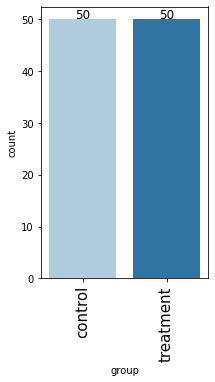

In [15]:
labeled_barplot(df, 'group')

#### Observations about Group
50 people are in the control group vs. 50 who are in the treatment group.

### 1.3.2 Convertion

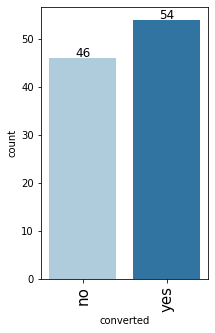

In [16]:
labeled_barplot(df, 'converted')

#### Observations about the Convertion
54 people who landed on the page were converted vs. 46 who weren't. The conversion rate is 54%. 

### 1.3.3 Preferred language

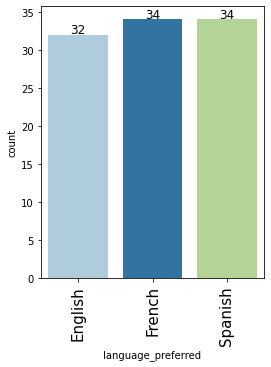

In [17]:
labeled_barplot(df, 'language_preferred')

#### Observations about Preferred Language
32 people chose English to look at the page, 34 chose French and another 34 chose Spanish.

### 1.3.4 Time spent on Page

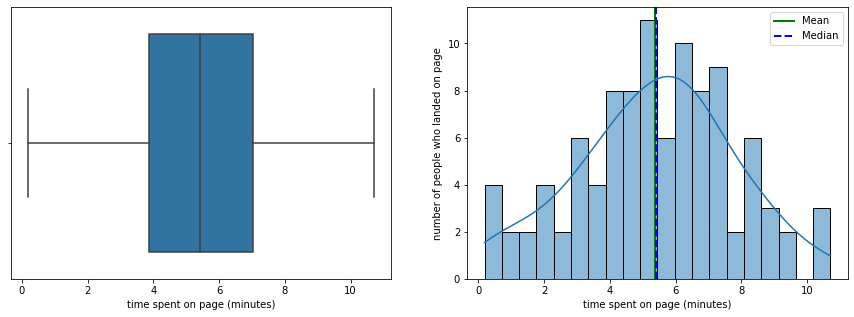

In [18]:
# plotting time_spent_on_page
fig = plt.gcf()
fig.set_size_inches(15,5) #plot size

#left plot
plt.subplot(1,2,1); 
plt.xlabel("time spent on page (minutes)");
sns.boxplot(data = df, x =df['time_spent_on_the_page']).set(xlabel="time spent on page (minutes)");

#right plot
plt.subplot(1,2,2); 
plt.xlabel("time spent on page (minutes)");
plt.ylabel("number of people who landed on page");
plt.axvline(df['time_spent_on_the_page'].mean(), color='g', linewidth=2,label="Mean");
plt.axvline(df['time_spent_on_the_page'].median(), color='b', linestyle='dashed', linewidth=2,label="Median");
plt.legend()
sns.histplot(df['time_spent_on_the_page'],bins=20,kde="kde");

In [19]:
df['time_spent_on_the_page'].skew() 

-0.1494803722510636

In [20]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

### Observations about Time spent on Page
- The time spent on the page ranges from .19 to 10.71 minutes with an avarage time of 5.38 minutes and a mean of 5.12 minutes. 
- With a skewness of - 0.15 the distribution is approximately symetric.

## 1.4 Bivariate Analysis

### 1.4.1 Group vs. Conversion Rate

In [21]:
# Creating a table with conversion rate in percent (yes/(no+yes))*100) for both groups

#calculating conversion rate for each group 
CR_C=round(df[df["group"]=="control"]['converted'].value_counts(1).sort_index()[1]*100,1)
CR_T=round(df[df["group"]=="treatment"]['converted'].value_counts(1).sort_index()[1]*100,1)
#.value_counts(1) percentage values
#.sort_index()[1] makes this the yes-value in both groups

#creating a data frame
d = [ ["Control Group", CR_C],["Treatment Group", CR_T]]
df_group = pd.DataFrame(d, columns = ['Group','Conversion Rate'])
df_group.set_index('Group')

,Conversion Rate
Group,
Control Group,42.0
Treatment Group,66.0


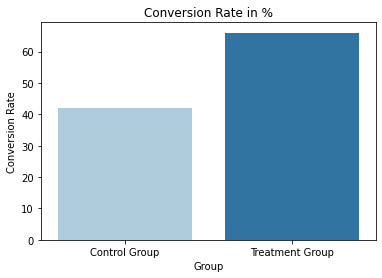

In [22]:
#plotting it
sns.barplot(x='Group',y='Conversion Rate',data=df_group, palette="Paired").set(title='Conversion Rate in %');

#### Observations:
In the treatment group 66% of people were converted compared to 42% in the control group.


### 1.4.2 Group vs. Language

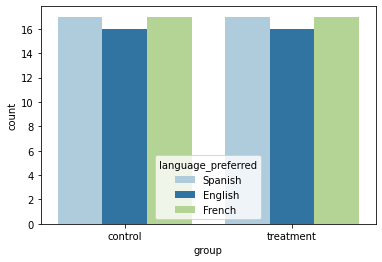

In [23]:
sns.countplot(x ='group', data = df,hue='language_preferred', palette="Paired");

In [24]:
print(df[df["group"]=="control"]['language_preferred'].value_counts())
df[df["group"]=="treatment"]['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64


Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

#### Observations:
- In both the control group and the treatment group we have 17 people who chose French, 17 who chose Spanish and 16 who chose English. 
- The fact that the ratio of preferred languages is the about the same over all data and and the exaxt same in the respective groups points to the data being purposefully picked by language as well as group.

### 1.4.3 Conversion Rate vs. Language vs. Group
We will only look at the conversion rate instead of the yes/no values to get a cleaner visual.

In [25]:
'''
Creating a table with conversion rate in percent (yes/(no+yes))*100) for all groups combined, the control group and 
the treatment group split up by preferred languages.
'''
# calculating the conversion rates
SB=round(df[df['language_preferred']=="Spanish"]['converted'].value_counts(1).sort_index()[1]*100,1)
EB=round(df[df['language_preferred']=="English"]['converted'].value_counts(1).sort_index()[1]*100,1)
FB=round(df[df['language_preferred']=="French"]['converted'].value_counts(1).sort_index()[1]*100,1)
SC=round(df[(df["group"]=="control") & (df['language_preferred']=="Spanish")]['converted'].value_counts(1).sort_index()[1]*100,1)
EC=round(df[(df["group"]=="control") & (df['language_preferred']=="English")]['converted'].value_counts(1).sort_index()[1]*100,1)
FC=round(df[(df["group"]=="control") & (df['language_preferred']=="French")]['converted'].value_counts(1).sort_index()[1]*100,1)
ST=round(df[(df["group"]=="treatment") & (df['language_preferred']=="Spanish")]['converted'].value_counts(1).sort_index()[1]*100,1)
ET=round(df[(df["group"]=="treatment") & (df['language_preferred']=="English")]['converted'].value_counts(1).sort_index()[1]*100,1)
FT=round(df[(df["group"]=="treatment") & (df['language_preferred']=="French")]['converted'].value_counts(1).sort_index()[1]*100,1)

# putting it in a data frame
d = [ ["Spanish", SB,SC, ST],["English", EB,EC, ET],["French", FB, FC, FT]]
df_lang = pd.DataFrame(d, columns = ['Language','All Data', 'Control Group','Treatment Group'])
print('\nConversion rate in percent for each language for all data and split into the control and treatment group')
df_lang.set_index('Language')


Conversion rate in percent for each language for all data and split into the control and treatment group


,All Data,Control Group,Treatment Group
Language,,,
Spanish,52.9,41.2,64.7
English,65.6,68.8,62.5
French,44.1,17.6,70.6


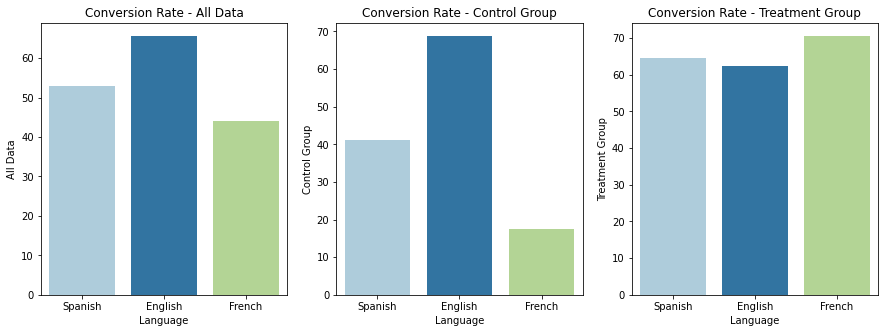

In [26]:
# plotting language vs. conversion rate
fig = plt.gcf()
fig.set_size_inches(15,5)

#left plot
plt.subplot(1,3,1); 
sns.barplot(x='Language',y='All Data',data=df_lang, palette="Paired").set(title='Conversion Rate - All Data');

#middle plot
plt.subplot(1,3,2); 
sns.barplot(x='Language',y='Control Group',data=df_lang, palette="Paired").set(title='Conversion Rate - Control Group');

#right plot
plt.subplot(1,3,3); 
sns.barplot(x='Language',y='Treatment Group',data=df_lang, palette="Paired").set(title='Conversion Rate - Treatment Group');

### Observations

- The conversion rate in the **control group** is clearly different for the different languages. It was the highest for English (68.8%), followed by Spanish (41.2%) and the lowest was French (17.6%)
- In the **treatment group** the conversion rates for the different languages are closer together: French (70.6%, Spanish 64.7% and English 62.5%)
- The conversion rate of people who chose **Spanish** was 41.2% in the control group vs. 64.7%  in the treatment group meaning it is a higher on the new page. 
- The conversion rate of people who chose **French** was 17.6% in the control group vs. 70.6%  in the treatment group meaning it is a lot higher on the new page. 
- The percentage of people who chose **English** was 68.8% in the control group vs. 62.5%  in the treatment group which is a bit lower on the new page.

### 1.4.4 Time spent on Page vs. Group

In [27]:
# Mean time spent by group
round(df.groupby('group')['time_spent_on_the_page'].mean(),1)

group
control      4.5
treatment    6.2
Name: time_spent_on_the_page, dtype: float64

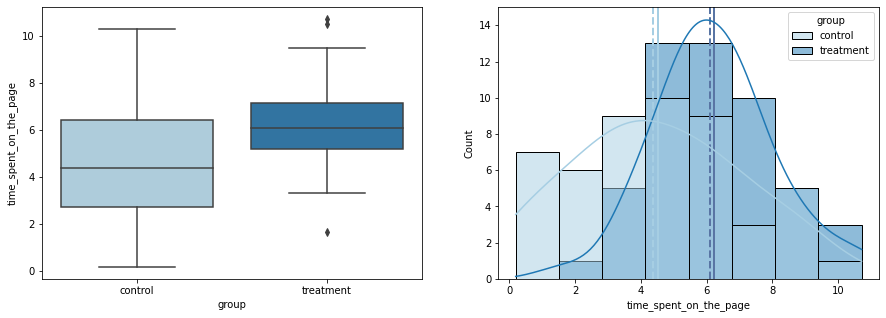

In [28]:
#plotting 2 plots together, setting size of combined plot
fig = plt.gcf()
fig.set_size_inches(15,5)

# left - Time spent on page vs. control/treatment group 
plt.subplot(1,2,1); 
sns.boxplot(x = 'group', y = "time_spent_on_the_page", data = df, palette="Paired");

# right - Time spent on page vs. control/treatment group 
plt.subplot(1,2,2); 
plt.axvline(df[df["group"]=="control"]['time_spent_on_the_page'].mean(), color='#A6CEE3', linewidth=2,label="Mean control");
plt.axvline(df[df["group"]=="control"]['time_spent_on_the_page'].median(), color='#A6CEE3',linestyle='dashed', linewidth=2,label="Median Weekend");
plt.axvline(df[df["group"]=="treatment"]['time_spent_on_the_page'].mean(), color='#5975A4', linewidth=2,label="Mean treatment");
plt.axvline(df[df["group"]=="treatment"]['time_spent_on_the_page'].median(), color='#5975A4',linestyle='dashed', linewidth=2,label="Median Weekday");
sns.histplot(data=df, x="time_spent_on_the_page", kde=True, hue="group", palette="Paired");

### Observations

People in the treatment group spent more time on average on the page (6.2 minutes) than people in the control group (4.5 minutes).

### 1.4.5 Time spent on Page vs. Converted vs. Group

In [29]:
# Mean time spent for converted or not converted over both groups
round(df.groupby(['converted'])['time_spent_on_the_page'].mean(),1)

converted
no     3.9
yes    6.6
Name: time_spent_on_the_page, dtype: float64

In [30]:
# Mean time spent for converted or not converted split by group
round(df.groupby(['converted','group'])['time_spent_on_the_page'].mean(),1)

converted  group    
no         control      3.3
           treatment    4.9
yes        control      6.2
           treatment    6.9
Name: time_spent_on_the_page, dtype: float64

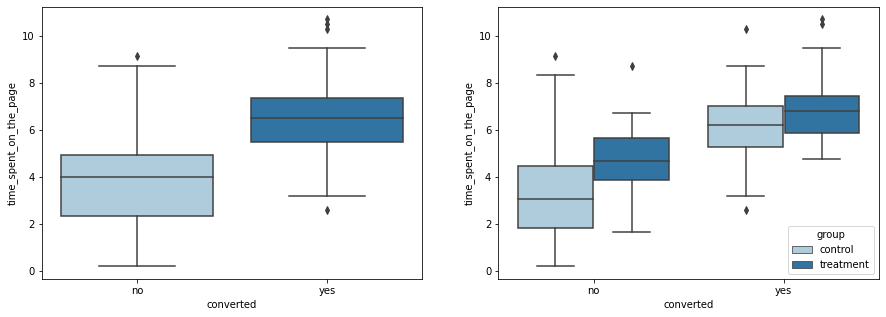

In [31]:
#plotting 2 plots together, setting size of combined plot
fig = plt.gcf()
fig.set_size_inches(15,5)

# left - Time spent on page vs. converted seperated by control/treatment group 
plt.subplot(1,2,1); 
sns.boxplot(x = 'converted', y = "time_spent_on_the_page", data = df, palette="Paired");
# right - Time spent on page vs. converted seperated by control/treatment group 
plt.subplot(1,2,2); 
sns.boxplot(x = 'converted', y = "time_spent_on_the_page",hue='group', data = df, palette="Paired");

### Observations

- People who were converted spent more time on the page (6.6 minutes) than people who left without taking action on the page (3.9 minutes). 
- People in the treatment group who weren't converted spent more time on the page (4.8 minutes) than people in the control group (3.3 minutes). The same but not as obvious is true for people who were converted (6.9 vs 6.1 minutes).

### 1.4.5 Time spent on Page vs. Language vs. Group

In [32]:
# Mean time spent for preferred language over both groups
round(df.groupby('language_preferred')['time_spent_on_the_page'].mean(),1)

language_preferred
English    5.6
French     5.3
Spanish    5.3
Name: time_spent_on_the_page, dtype: float64

In [33]:
# Mean time spent for preferred language split by group
round(df.groupby(['language_preferred','group'])['time_spent_on_the_page'].mean(),1)

language_preferred  group    
English             control      4.5
                    treatment    6.7
French              control      4.3
                    treatment    6.2
Spanish             control      4.8
                    treatment    5.8
Name: time_spent_on_the_page, dtype: float64

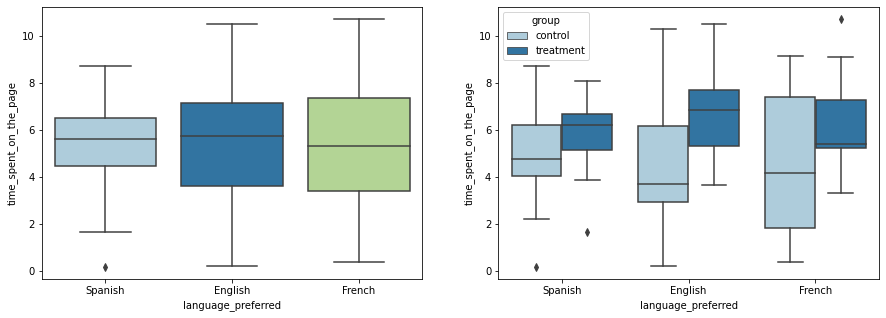

In [34]:
#plotting 2 plots together, setting size of combined plot
fig = plt.gcf()
fig.set_size_inches(15,5)

# 1. Time spent on page vs. language seperated by control/treatment group 
plt.subplot(1,2,1); 
sns.boxplot(x = 'language_preferred', y = "time_spent_on_the_page", data = df, palette="Paired");

# 2. Time spent on page vs. Language
plt.subplot(1,2,2); 
sns.boxplot(x = 'language_preferred', y = "time_spent_on_the_page",hue='group', data = df, palette="Paired");

### Observations
- Overall the language doesn't seem to come into play very much for the time spent on the page. 
- In the control group the average time spent on the Spanish page was the highest with 4.8 minutes vs. 4.5 in English and 4.3 in French
- In the treatment group the average time spent was up for all 3 languages, the highest being English with 6.7 minutes, followed by French with 6.3 and Spanish with 5.8.


## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### 2.1 Perform Visual Analysis

Dashed vertical line = Mean / not dashed = Median


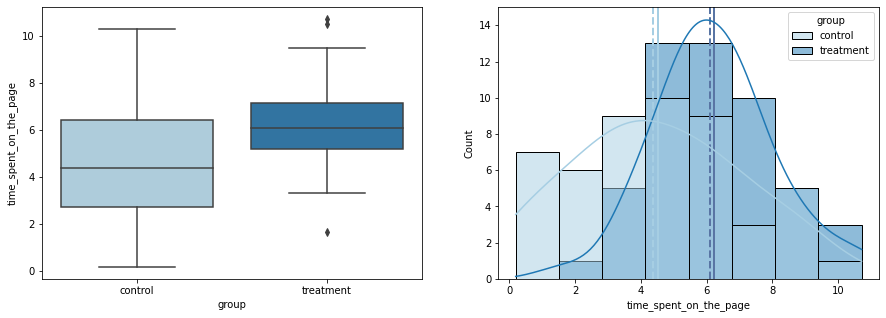

In [35]:
print('Dashed vertical line = Mean / not dashed = Median') #explain lines in plots. Couldn't get it to add second legend
#plotting 2 plots together, setting size of combined plot
fig = plt.gcf()
fig.set_size_inches(15,5)


# left - Time spent on page vs. control/treatment group 
plt.subplot(1,2,1); 
sns.boxplot(x = 'group', y = "time_spent_on_the_page", data = df, palette="Paired");

# right - Time spent on page vs. control/treatment group 
plt.subplot(1,2,2); 
plt.axvline(df[df["group"]=="control"]['time_spent_on_the_page'].mean(), color='#A6CEE3', linewidth=2,label="Mean control");
plt.axvline(df[df["group"]=="control"]['time_spent_on_the_page'].median(), color='#A6CEE3',linestyle='dashed', linewidth=2,label="Median Weekend");
plt.axvline(df[df["group"]=="treatment"]['time_spent_on_the_page'].mean(), color='#5975A4', linewidth=2,label="Mean treatment");
plt.axvline(df[df["group"]=="treatment"]['time_spent_on_the_page'].median(), color='#5975A4',linestyle='dashed', linewidth=2,label="Median Weekday");
sns.histplot(data=df, x="time_spent_on_the_page", kde=True, hue="group", palette="Paired");


### 2.2 Define the null and alternate hypotheses

Let $\mu_C, \mu_T$ be the mean time spent on the old page (Control Group) and the new page (Treatment Group) respectively. 
We will test the null hypothesis

>$H_0:\mu_C=\mu_T$

against the alternate hypothesis

>$H_a:\mu_C<\mu_T$

### 2.3 Select Appropriate test

This looks like a two independent z- or t-test. Let's take a look at the standard deviation and the distribiution first.

In [36]:
print('The mean time spent on the old page is ' + str(round(df[df["group"]=="control"]['time_spent_on_the_page'].mean(),2)))
print('The mean time spent on the new page is ' + str(round(df[df["group"]=="treatment"]['time_spent_on_the_page'].mean(),2)))
print('The standard deviation of time spent on the old page is ' + str(round(df[df["group"]=="control"]['time_spent_on_the_page'].std(),2)))
print('The standard deviation of time spent on the new page is ' + str(round(df[df["group"]=="treatment"]['time_spent_on_the_page'].std(),2)))

The mean time spent on the old page is 4.53
The mean time spent on the new page is 6.22
The standard deviation of time spent on the old page is 2.58
The standard deviation of time spent on the new page is 1.82


#### Does Time spent on the Page follow a normal distribution? - Shapiro-Wilk’s test

 We will test the same null hypothesis for the control group and the treatment group

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [37]:
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df[df["group"]=="control"]['time_spent_on_the_page']) 
print('The p-value for the control group is', p_value)
w, p_value = stats.shapiro(df[df["group"]=="treatment"]['time_spent_on_the_page']) 
print('The p-value for the treatment group is', p_value)

The p-value for the control group is 0.45611920952796936
The p-value for the treatment group is 0.8040016293525696


#### Insight
As the p-value for both groups is much higher than the usual significance level of 5%, we fail to reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that the populations for both groups for time spent on the page follow a normal distribiution. 

#### Are the population standard deviations in both groups equal for the time spent on the page? - Levene’s test
We will test the null hypothesis

>$H_0$: The population variances in both groups are equal

against the alternative hypothesis

>$H_a$: The population variances in both groups are different

In [38]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df[df["group"]=="control"]['time_spent_on_the_page'], 
                                   df[df["group"]=="treatment"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.008950671168914445


#### Insight
As the p-value is much less than the usual significance level of 5%, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that the population variances are not equal at a 5% significance level. Since the standard deviation is the square root of the variance, the same can be concluded for the standard deviation.
This calls for a Two Independednt Sample T-Test.

#### Let's test whether the T-Test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we confirmed that with a Shapiro-Wilk’s test.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different and we confirmed it with a Levene’s test.
* Random sampling from the population - Yes, we are informed that the collected sample is simple random sample.

#### Conclusion

The appropriate test for the problem is a Two Independednt Sample T-Test with unequal population standard deviations

### 2.4 Decide the significance level

The guidelines call for a significance level of 0.05 for all tests.

### 2.5 Collect and prepare data

In [39]:
time_control=df[df["group"]=="control"]['time_spent_on_the_page'] #list of time spent on page values in control group
time_treatment=df[df["group"]=="treatment"]['time_spent_on_the_page'] #list of time spent on page values in treatment group

### 2.6 Calculate the p-value

In [40]:
#run the test and find the p-value
from scipy.stats import ttest_ind #import test function
'''
time_control: Time spent on the page in the control group 
time_treatment: Time spent on the page in the treatment group 
equal_var = False: variances are not equal
alternative = 'less': alternet hypothesis is one tailed 'less than'
'''

test_stat, p_value = ttest_ind(time_control, time_treatment, equal_var = False, alternative = 'less')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### 2.7 Compare the p-value with $\alpha$

The p-value is much smaller than the level of significance.

### 2.8  Draw inference

The null hypothesis can be rejected. Thus there is enough statistical evidence to conclude that the treatment group spends more time on the page than the control group.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### 3.1 Perform Visual Analysis

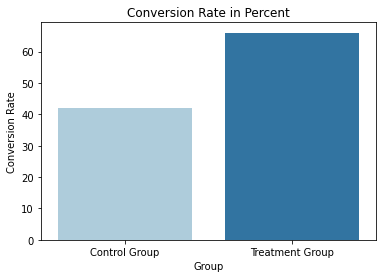

In [41]:
# for data creation s. bivariant analysis
sns.barplot(x='Group',y='Conversion Rate',data=df_group, palette="Paired").set(title='Conversion Rate in Percent');

#### Observations:
As mentioned in the bivariant analysis: In the treatment group aka the new page 66% of visitors were converted compared to 42% in the control group.

### 3.2 Define the null and alternate hypotheses
Let $p_C, p_T$ be the conversion rate in the Control Group and the Treatment Group respectively. 

We will test the null hypothesis

>$H_0:p_C=p_T$

against the alternate hypothesis

>$H_a:p_C< p_T$

### 3.3 Select Appropriate test

This looks like a Two Proportions Z-Test. We are dealing with binominal distributions (converted=yes/no) testing proportions. Let's see if they can be approximated by a normal distribiution?

In [42]:
#Self defined function to test if binominal data can be used like a normal distribiution
def test_normal_in_bino(data):
    '''
    data = list of unknown legnth with only two 2 values in it
    '''
    p=data.value_counts(1)[0] #probability of first value
    n=data.count() #length of data
    
    #p*n and n*(1-p) both must be >10 in order for it to be usable as a normal distribution
    res1=p*n
    res2=n*(1-p)
    if res1<10 or res2<10:
        print('This can''t be treated like normal distribiution')
    else: print('Since',round(res1,2),'and',round(res2,2), 'are >10, this can be treated like normal distribiution')

In [43]:
test_normal_in_bino(df[df["group"]=="control"]['converted']) #Test converted in the control group

Since 29.0 and 21.0 are >10, this can be treated like normal distribiution


In [44]:
test_normal_in_bino(df[df["group"]=="treatment"]['converted']) #Test converted in the treatment group

Since 33.0 and 17.0 are >10, this can be treated like normal distribiution


#### Let's test whether the Z-Test assumptions are satisfied or not

*   Binomally distributed population - Yes, a person is eitehr converted or not
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distributions be approximated as normal distributions - Yes, we tested for this above

#### Conclusion

The appropriate test for the problem is a Two Proportions Z-Test.

### 3.4 Decide the significance level

The guidelines call for a significance level of 0.05 for all tests.

### 3.5 Collect and prepare data

In [45]:
count_control=df[(df["group"]=="control")&(df['converted']=='yes')]['converted'].count() # amount of conv=yes in control group
n_control=df[df["group"]=="control"]['converted'].count() # amount all in control group
count_treatment=df[(df["group"]=="treatment")&(df['converted']=='yes')]['converted'].count()  # amount of conv=yes in treatment group
n_treatment=df[df["group"]=="control"]['converted'].count()  # amount all in treatment group

convert_count = np.array([count_control, count_treatment]) #array with conv=yes - both groups
nobs = np.array([n_control, n_treatment]) #array with all  - both groups

### 3.6 Calculate the p-value

In [46]:
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(convert_count, nobs,alternative='smaller')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### 3.7 Compare the p-value with $\alpha$
The p-value is much smaller than the level of significance.

### 3.8  Draw inference

The null hypothesis can be rejected. Thus there is enough statistical evidence to conclude that in the treatment group more people are converted than in the control group.


## 4. Are the conversion and preferred language independent or related? (10 Marks)

### 4.1 Perform Visual Analysis

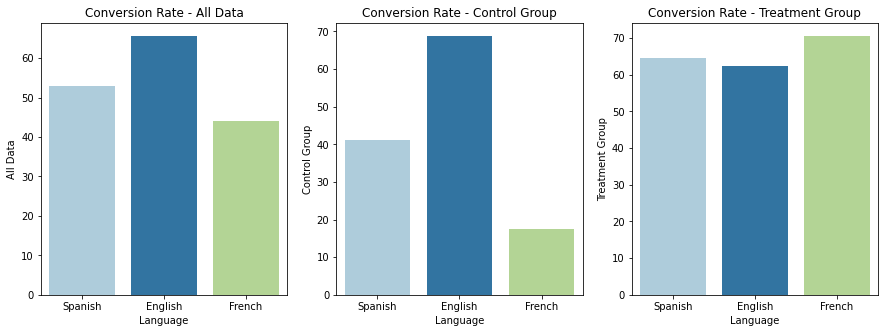

In [47]:
#data creation s. bivariant analysis
fig = plt.gcf()
fig.set_size_inches(15,5)

plt.subplot(1,3,1); 
sns.barplot(x='Language',y='All Data',data=df_lang, palette="Paired").set(title='Conversion Rate - All Data');

plt.subplot(1,3,2); 
sns.barplot(x='Language',y='Control Group',data=df_lang, palette="Paired").set(title='Conversion Rate - Control Group');

plt.subplot(1,3,3); 
sns.barplot(x='Language',y='Treatment Group',data=df_lang, palette="Paired").set(title='Conversion Rate - Treatment Group');

In [48]:
# Create a table with the counts for converted vs. language
conv_lang=pd.crosstab( df["language_preferred"],df["converted"], dropna=False)
conv_lang

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### 4.2 Define the null and alternate hypotheses
Let $p_C, p_T$ be the percentage of people who converted from the old (Control Group) and the new page (Treatment Group) respectively. 

We will test the null hypothesis

>$H_0$:Conversion and preferred language are independent

against the alternate hypothesis

>$H_a$:Conversion and preferred language are not independent

### 4.3 Select Appropriate test

The appropriate test for the problem is a Chi-Square Test for Independence with unequal population standard deviations

#### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### 4.4: Decide the significance level

The guidelines call for a significance level of 0.05 for all tests.

### 4.5 Collect and prepare data

In [49]:
# Create a table with the counts for converted vs. language
conv_lang=pd.crosstab( df["language_preferred"],df["converted"], dropna=False)
conv_lang

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### 4.6 Calculate the p-value

In [50]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(conv_lang)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


Let's also take a look at this data seperated by group with the same hypothesis and test.

In [51]:
#data for the control group.
conv_lang_c=pd.crosstab( df[df["group"]=="control"]["language_preferred"],df[df["group"]=="control"]["converted"], dropna=False)
conv_lang_c

converted,no,yes
language_preferred,,
English,5,11
French,14,3
Spanish,10,7


In this case we can't use the Chi-Square Test for Independence since the assumption 'Expected value of the number of sample observations in each level of the variable is at least 5' isn't met. So let's just loo at the treatment group.

In [52]:
#data for the treatment group
conv_lang_t=pd.crosstab( df[df["group"]=="treatment"]["language_preferred"],df[df["group"]=="treatment"]["converted"], dropna=False)
conv_lang_t


converted,no,yes
language_preferred,,
English,6,10
French,5,12
Spanish,6,11


In [53]:
# find the p-value
chi, p_value, dof, expected = chi2_contingency(conv_lang_t)
print('The p-value is', p_value)

The p-value is 0.8783081441552572


### 4.7 Compare the p-value with $\alpha$
The p-value is higher than the level of significance for the whole data set as well as for the treatment group. 

### Step 4.8 Draw inference

We fail to reject the null hypothesis in both cases. Thus, there is enough statistical evidence to conclude that 
- the conversion rate over all is independent from the preferred language and
- the conversion rate in the treatment group alone is independent from the preferred language as well.


## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### 5.1 Perform Visual Analysis

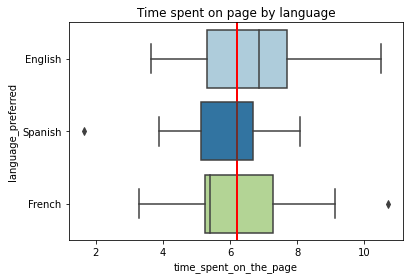

In [54]:
df_treatment=df[df["group"]=="treatment"].copy() #create a new df with the treatment group data only
plt.axvline(df_treatment['time_spent_on_the_page'].mean(), color='r', linewidth=2,label="Mean control"); #mean line
sns.boxplot(y = 'language_preferred', x = "time_spent_on_the_page", data = df_treatment, palette="Paired").set_title('Time spent on page by language');

### 5.2 Define the null and alternate hypotheses
Let $\mu_E, \mu_F, \mu_S$ be the avarage time people spend on the page using their preferred language of English (E), French (F) or Spanish (S)

We will test the null hypothesis

>$H_0:\mu_E=\mu_F=\mu_S$

against the alternate hypothesis

>$H_a:\mu_E, \mu_F , \mu_S$ are not all the same

### 5.3 Select Appropriate test

This looks like an ANOVA test, let's look at the variances first.

In [55]:
round(df_treatment.groupby('language_preferred')['time_spent_on_the_page'].std(),1)

language_preferred
English    2.0
French     1.9
Spanish    1.5
Name: time_spent_on_the_page, dtype: float64

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [56]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene(df_treatment[df_treatment["language_preferred"]=="Spanish"]['time_spent_on_the_page'], 
                                   df_treatment[df_treatment["language_preferred"]=="English"]['time_spent_on_the_page'], 
                                   df_treatment[df_treatment["language_preferred"]=="French"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


#### Insight
As the p-value is much higer than the usual significance level of 5%, we fail to reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that the population variances are indeed equal.

#### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption was verified through the Shapiro-Wilk’s test above in 2.3.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption was verified using the Levene's test above.


#### Conclusion

The appropriate test for the problem is a One-way ANOVA Test.

### 5.4 Decide the significance level

The guidelines call for a significance level of 0.05 for all tests.

### 5.5 Collect and prepare data



In [57]:
new_spanish_time=df_treatment[df_treatment["language_preferred"]=="Spanish"]['time_spent_on_the_page']
new_english_time=df_treatment[df_treatment["language_preferred"]=="English"]['time_spent_on_the_page']
new_french_time=df_treatment[df_treatment["language_preferred"]=="French"]['time_spent_on_the_page']

### 5.6 Calculate the p-value

In [58]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_spanish_time,new_english_time,new_french_time)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### 5.7 Compare the p-value with $\alpha$
The p-value is higher than the level of significance. 

### Step 7:  Draw inference

We fail to reject the null hypothesis. Thus, there is enough statistical evidence to conclude that the language has no influence on the time spent on the new page.

## Conclusion and Business Recommendations*

Kudos to the design team! The new page definitely has a better overall conversion rate than the old one. And even if no action is taken, visitors to the page are lingering longer, which indicates more interest and might make it more likely for them to come back (but this is another analysis for another time).

The conversion rate for the English page which was fairly high to begin whith hasn't really changed, but the Spanish and French pages have clearly improved conversion rates.

So the recommendation is to only use the new page going forward. 




*There is one assumptions that was made coming to this conclusion that I would like to take a closer look at:
We were told that the data was randomly chosen with 50 in the control group and 50 in the treatment group. However looking at the data suggests that whoever collected the data was also given specific numbers to be collected for each language. So it is likely that the actual preferred language for the population isn't about as evenly distributed as the sample data suggests. If most of the people landing on the page choose English as the preferred language, this conclusion needs to be revisited, since it would change the conversion rates of the treatment and control groups.